# Area bajo la curva ROC

Vamos a basarnos en un ejemplo de la documentación de sklearn: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data 
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [4]:
y_test[:5]

array([2, 1, 0, 2, 0])

En la siguiente celda aplicamos un one hot enconding a el target con label_binarize.

In [5]:
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]
print(y_test[:5])

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]


In [6]:
n_classes

3

Prestar atención en la siguiente celda:

En lugar de utilizar predict, utilizamos predict_proba que nos retorna una probabilidad por cada clase.

In [57]:
# Learn to predict each class
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
print(y_score[:5])

[[0.08 0.4  0.52]
 [0.2  0.4  0.4 ]
 [0.58 0.38 0.04]
 [0.08 0.4  0.52]
 [0.58 0.38 0.04]]


Por cada clase, calculamos la curva ROC

In [58]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [60]:
fpr

{0: array([0.        , 0.        , 0.11111111, 0.16666667, 0.24074074,
        0.25925926, 0.2962963 , 0.31481481, 1.        ]),
 1: array([0.        , 0.57777778, 1.        ]),
 2: array([0.        , 0.2745098 , 0.29411765, 0.33333333, 0.35294118,
        0.41176471, 0.47058824, 0.58823529, 0.96078431, 1.        ])}

Text(0.5, 1.0, 'clase 2')

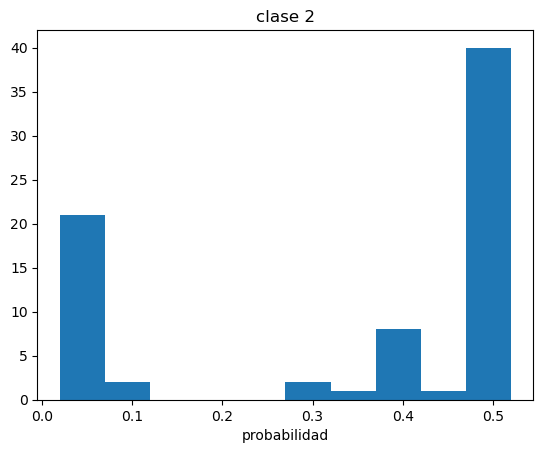

In [70]:
i=2
plt.hist(y_score[:, i]);
plt.xlabel("probabilidad")
plt.title(f'clase {i}')

In [36]:
y_score[:, 0]

array([0.08, 0.2 , 0.58, 0.08, 0.58, 0.08, 0.58, 0.08, 0.08, 0.18, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.58, 0.08, 0.16, 0.58, 0.58, 0.08, 0.1 ,
       0.58, 0.58, 0.08, 0.58, 0.58, 0.08, 0.54, 0.58, 0.08, 0.12, 0.58,
       0.08, 0.08, 0.24, 0.58, 0.08, 0.12, 0.2 , 0.08, 0.58, 0.08, 0.58,
       0.58, 0.48, 0.08, 0.08, 0.08, 0.08, 0.22, 0.08, 0.08, 0.28, 0.08,
       0.08, 0.18, 0.08, 0.08, 0.08, 0.08, 0.58, 0.08, 0.18, 0.3 , 0.2 ,
       0.08, 0.08, 0.58, 0.58, 0.08, 0.18, 0.58, 0.58, 0.08])

In [38]:
fpr, tpr, _ = roc_curve(y_test[:, 0], y_score[:, 0])

In [39]:
_

array([1.58, 0.58, 0.22, 0.2 , 0.18, 0.16, 0.12, 0.1 , 0.08])

In [26]:
tpr

{0: array([0., 1., 1., 1., 1., 1., 1., 1., 1.]),
 1: array([0.        , 0.96666667, 1.        ]),
 2: array([0.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333,
        1.        , 1.        , 1.        , 1.        , 1.        ])}

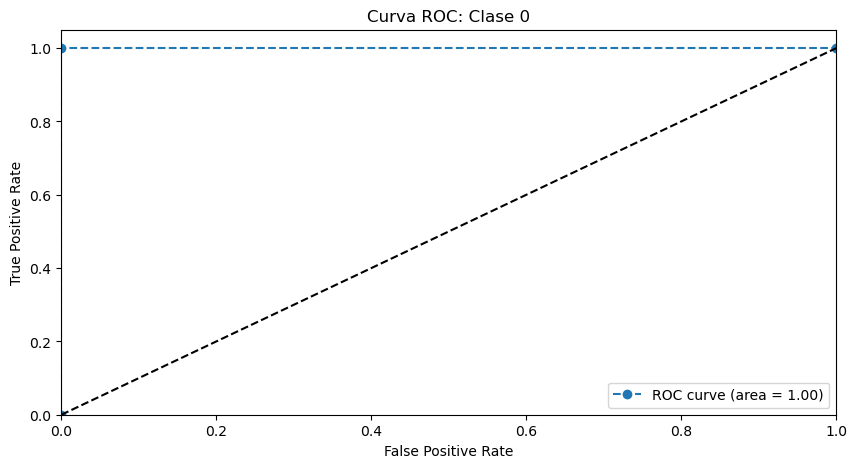

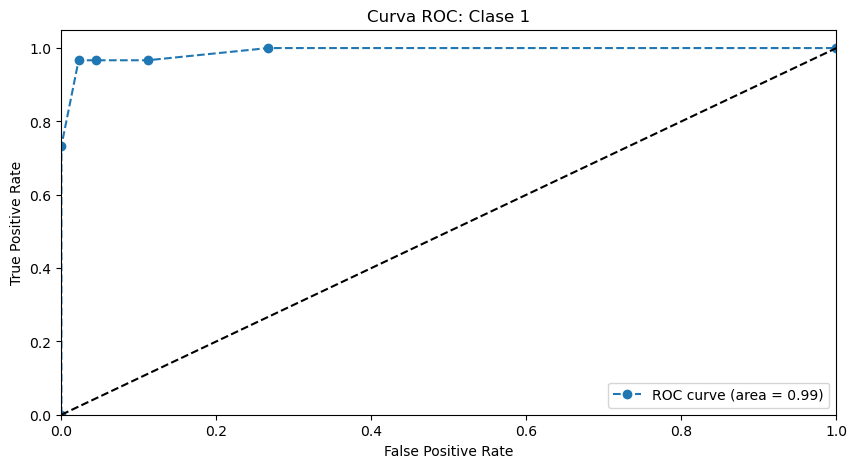

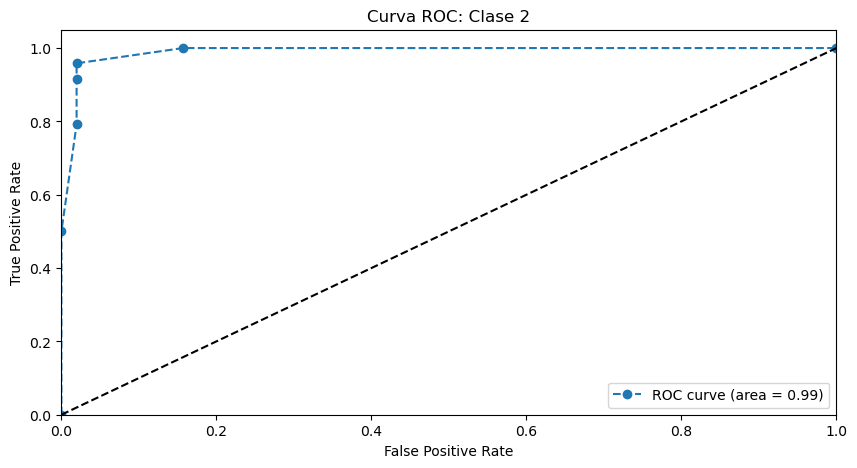

In [45]:
for i in range(n_classes):
    plt.figure(figsize=(10,5))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.show()

# Ejercicio

Por grupo buscar un dataset de clasificación binario, entrenar un modelo y graficar la curva ROC.

Algunos datasets pueden ser:
- Titanic
- NBA (clase 19)
- Breast Cancer Wisconsin
- Heart disease https://www.kaggle.com/ronitf/heart-disease-uci

Luego haremos una puesta en comùn entre todos